In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
from scipy import stats
%matplotlib inline

In [9]:
hdtrain = pd.read_csv("./data/train.csv")
hdtest = pd.read_csv("./data/test.csv")

we want to get more precise report from the relation between variables and SalePrice

In [20]:
pd.set_option('max_columns',1000)
pd.set_option('max_row',300)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
hdtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


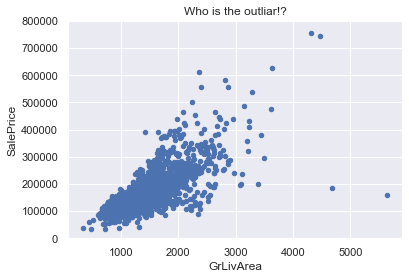

In [35]:
xvar = 'GrLivArea'
yvar = 'SalePrice'
data = pd.concat([hdtrain[yvar], hdtrain[xvar]], axis=1)
data.plot.scatter(x=xvar, y=yvar, ylim=(0,800000), title="Who is the outliar!?")

It seems that there are linear relationship between them? huhn?

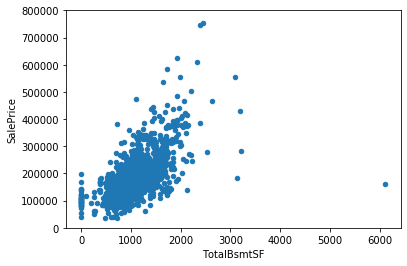

In [12]:
xvar = 'TotalBsmtSF'
data = pd.concat([hdtrain[yvar], hdtrain[xvar]], axis=1)
data.plot.scatter(x=xvar, y=yvar, ylim=(0,800000))

This is not really like a linear function... it is an (Strong linear) exponential relationship????

(-0.5, 9.5, 0, 800000)

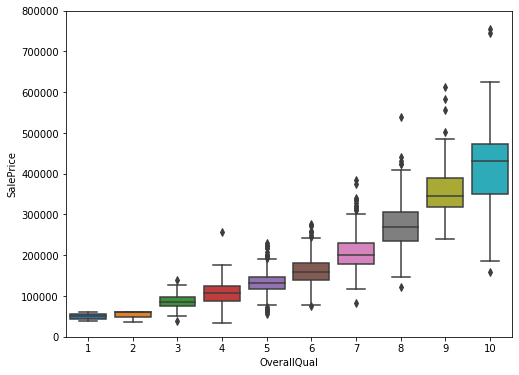

In [13]:
xvar="OverallQual"
tempdata = pd.concat([hdtrain[yvar], hdtrain[xvar]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=xvar, y=yvar, data=tempdata)
fig.axis(ymin=0, ymax=800000)

The price is positive related to the overall material

(-0.5, 8.5, 0, 800000)

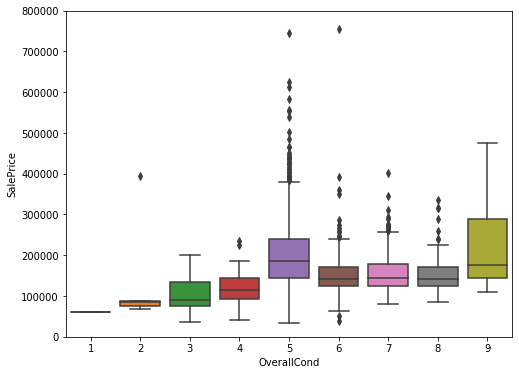

In [14]:
xvar="OverallCond"
tempdata = pd.concat([hdtrain[yvar], hdtrain[xvar]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=xvar, y=yvar, data=tempdata)
fig.axis(ymin=0, ymax=800000)

but is very weak positive relative to the overall condition rate

In [15]:
cols = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols:
    hdtrain[col].fillna("None", inplace=True)

A simple method to deal with discrete values: delete them

(-0.5, 3.5, 0, 800000)

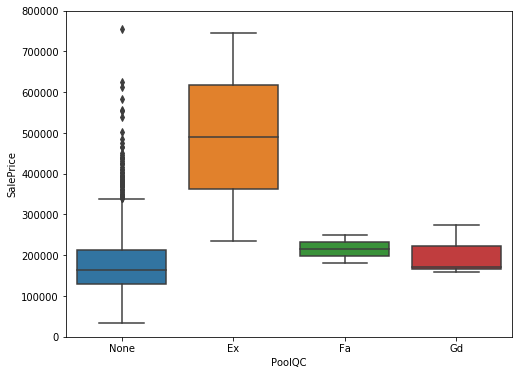

In [16]:
xvar="PoolQC"
tempdata = pd.concat([hdtrain[yvar], hdtrain[xvar]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=xvar, y=yvar, data=tempdata)
fig.axis(ymin=0, ymax=800000)

House's price will become very high if it have a excellent swimming pool

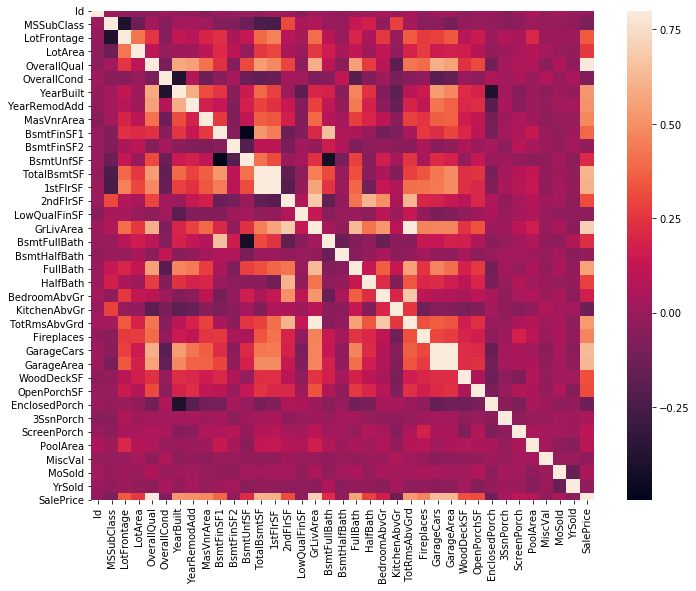

In [17]:
corrmatrix = hdtrain.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmatrix,vmax=.8,square=True)

The heatmap proved that the overallcond didn't closely linked with SalePrice that we observed above. We noticed that LotFrontage OverallQual, YearBuilt, YearRemodAdd,MasVnrArea,BsmtfinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,FirePlaces is very heat with SalePrice.

<class 'pandas.core.indexes.base.Index'>


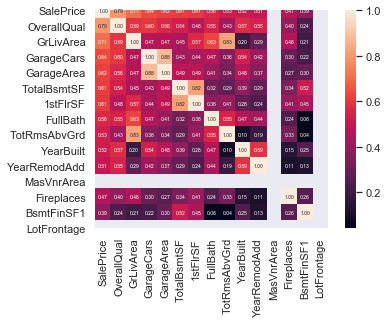

In [18]:
k=15
columns = corrmatrix.nlargest(k,yvar)[yvar].index
print(type(columns))
cocm = np.corrcoef(hdtrain[columns].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cocm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [ ]:
sns.set()
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(hdtrain[columns], height = 2.5)
plt.show()

In [ ]:
columns = ['SalePrice','FullBath', 'YearBuilt','GarageArea','1stFlrSF','YearRemodAdd']
sns.pairplot(hdtrain[columns], height=2.5)
plt.show()

In [21]:
print(hdtrain.columns)
print(len(hdtrain.columns))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

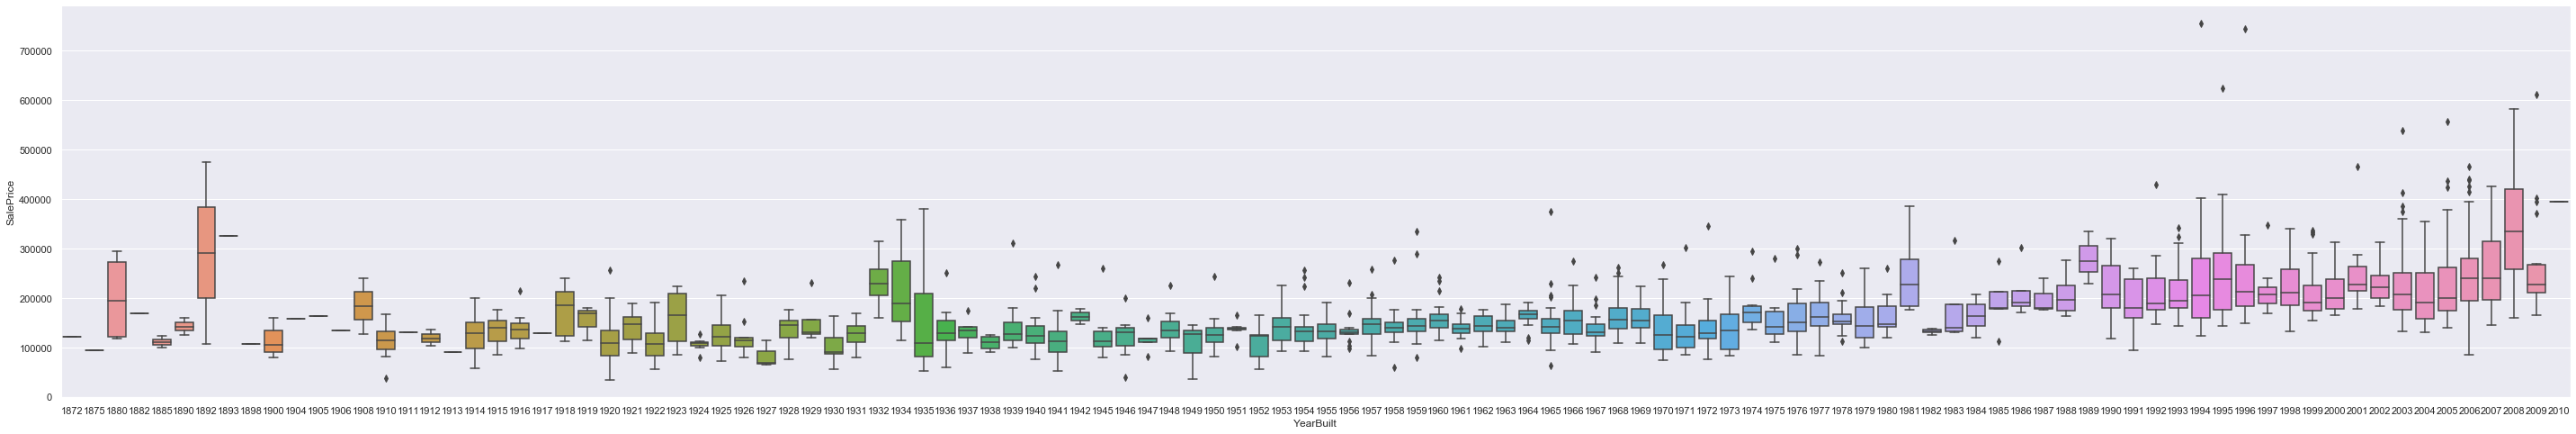

In [24]:
plt.figure(figsize=(50,8))
sns.boxplot(hdtrain.YearBuilt,hdtrain.SalePrice)

In [25]:
print(type(hdtrain.YearBuilt[1]))

<class 'numpy.int64'>


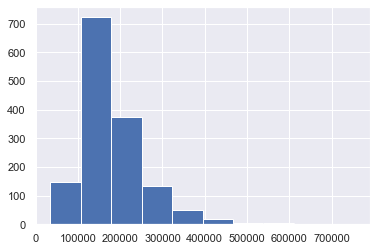

In [26]:
sp_list = hdtrain.SalePrice
sp_list.hist()

In [27]:
print(hdtrain['SalePrice'].describe())

count     1460.00000
mean    180921.19589
std      79442.50288
min      34900.00000
25%     129975.00000
50%     163000.00000
75%     214000.00000
max     755000.00000
Name: SalePrice, dtype: float64


In [28]:
print("Skewness: %f" % hdtrain['SalePrice'].skew())
print("Kurtosis: %f" % hdtrain['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


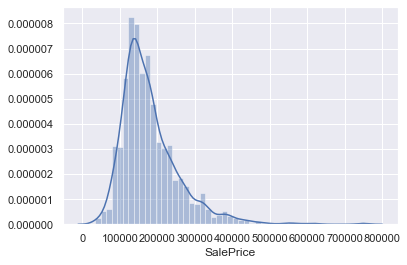

In [29]:
sns.distplot(hdtrain['SalePrice'])

In [31]:
hdtrain=hdtrain.drop(hdtrain.loc[hdtrain['Electrical'].isnull()].index)

Simply drop the null values in above

In [32]:
saleprice_scaled = StandardScaler().fit_transform(hdtrain['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('low of the distribution:')
print(low_range)
print('\nhigh of the distribution:')
print(high_range)

low of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

high of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


In [36]:
hdtrain=hdtrain[hdtrain.GrLivArea<4000]


Start deal with outliars.(Like above)

In [22]:
hdtotal = pd.concat([hdtrain,hdtest],ignore_index=True,sort=False)
print(hdtotal.columns)
print(len(hdtotal.columns))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [23]:
null_count=hdtotal.isnull().sum().sort_values(ascending=False)
print(hdtotal.shape[0])
percent=(hdtotal.isnull().sum()/hdtotal.shape[0]).sort_values(ascending=False)
missing = pd.concat([null_count, percent], axis=1, keys=['total', 'percent'],sort=False)
missing

2919


,total,percent
PoolQC,2909,0.99657
MiscFeature,2814,0.96403
Alley,2721,0.93217
Fence,2348,0.80439
SalePrice,1459,0.49983
FireplaceQu,1420,0.48647
LotFrontage,486,0.16650
GarageQual,159,0.05447
GarageYrBlt,159,0.05447
GarageFinish,159,0.05447


In [ ]:
total = hdtotal.copy()


In [30]:
cols = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols:
    hdtotal[col].fillna("None", inplace=True)